### Linear Congruential Generator
A linear congruential generator (LCG) is a type of pseudorandom number generator (PRNG) that generates a sequence of numbers based on a linear recurrence relation. It is one of the oldest and simplest methods for generating pseudorandom numbers.
The LCG algorithm uses the following recurrence relation to generate the sequence of numbers:
$$x_{t+1} = (a * x_t + c) \mod m$$

### Inverse Transform
From the LCG algorithm, we can easily generate almost uniform distribution, however, the problem is how we can random sample of other distributions? Given CDF of target distribution, try to find the inverse of that CDF or so called PPF. We then generate a probability $u$ and because the PPF is the inverse CDF, the output will be the corespond value of given probability $u$:

![CDF-PPF](./images/cdf-ppf-0.png)

#### Algorithm
1. Generate $u \sim U(0,1)$
2. Find the PPF of target distribution
3. x = PPF(u)

#### Exponential distribution
Find the closed form of the CDF first:

- $F(X) = P(x \le X) = \int_{-\infty}^{x} \lambda e^{-\lambda x} dx$
- $= -e^{-\lambda x} |_0^a = 1 - e^{-\lambda x} $

To find the inverse of CDF, we already know the $F(X) = u$, therefore:
- $u = 1 - e^{-\lambda x}$
- $1 - u = e^{-\lambda x}$
- $ln(1 - u) = -\lambda x$
- $\implies x = \frac{-ln(1-u)}{\lambda}$

The PPF of exponential distribution is: $F^{-1}(u) = \frac{-ln(1-u)}{\lambda}$
#### Limitation
The inverse transform could not be applied for Normal Distribution or distributions that do not have the closed form of the PPF. We may need to apply another algorithm like rejection sampling.

### Implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.stats import expon
from scipy.stats import geom
from scipy.stats import logistic
from scipy.stats import fisk
from scipy.stats import exponweib
from scipy.stats import norm
from scipy.stats import uniform

In [2]:
def random_uniform(N, m=2**10, a=1103515245, c=12345, seed=21, low=0, high=1) -> np.array:
    X = [seed]
    for _ in range(N):
        b = (X[-1] * a + c) % m
        b = b / m
        X.append(b)
    X = X[1:]
    X = np.array(X)
    r = high - low
    return X * r + low

def random_exp(X: np.array, lmb = 1):
    return -np.log(1 - X) / lmb

def random_geometric(X: np.array, p = 0.06):
    return np.floor(np.log(1-X) / np.log(1-p))

def random_logistic(X: np.array, mu=2, s=1):
    return mu + s * np.log(X / (1 - X))

def random_fisk(X: np.array, c):
    return ((X**(-1.0) - 1)**(-1.0/c))

def random_exponweib(X: np.array, a, c):
    f = -(np.log(1 - X**(1.0/a)))
    return np.power(f, 1.0/c)

(array([0.9622926 , 1.02931297, 0.97929777, 0.95829138, 1.01330811,
        0.99030111, 1.0353148 , 1.00730628, 0.99830355, 1.02931297]),
 array([1.95211440e-04, 1.00164805e-01, 2.00134399e-01, 3.00103993e-01,
        4.00073587e-01, 5.00043181e-01, 6.00012775e-01, 6.99982369e-01,
        7.99951963e-01, 8.99921556e-01, 9.99891150e-01]),
 <BarContainer object of 10 artists>)

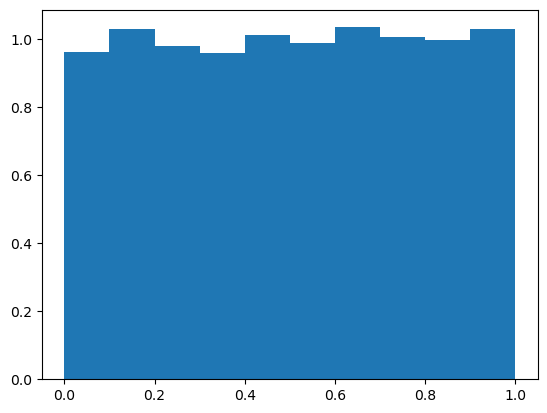

In [4]:
X = random_uniform(10000, seed=21)
plt.hist(X, density=True)

Text(0.5, 1.0, 'Expon Weibull(a=2.89,c=1.95)')

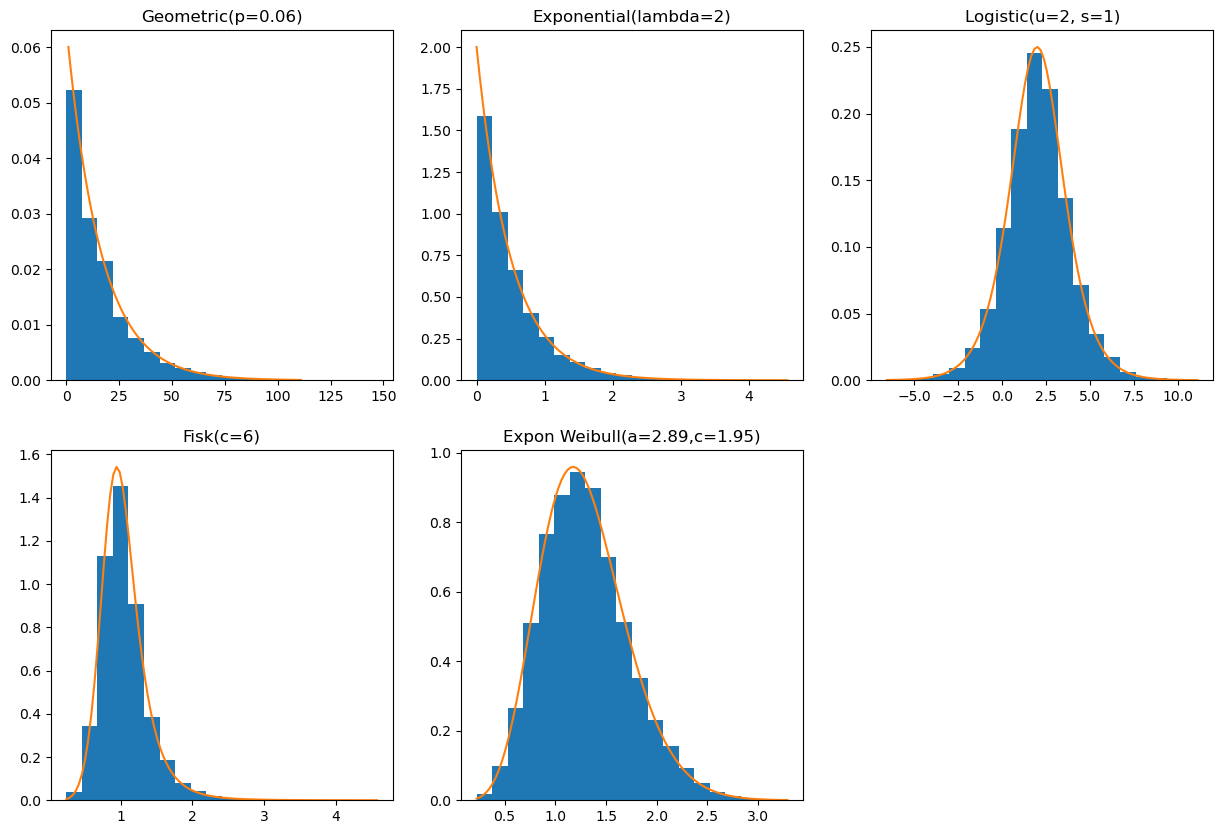

In [5]:
plt.figure(figsize=(15,10))

p = 0.06
G = random_geometric(X, p=0.06)
T = np.arange(geom.ppf(0.001, p),geom.ppf(0.999, p))
U = geom.pmf(T, 0.06)
plt.subplot(2, 3, 1)
plt.hist(G, density=True, bins=20)
plt.plot(T, U)
plt.title(f"Geometric(p={p})")

lmb = 2
G = random_exp(X, lmb)
T = np.linspace(0, max(G), 100)
U = expon.pdf(T, scale=1/lmb)
plt.subplot(2, 3, 2)
plt.hist(G, density=True, bins=20)
plt.plot(T, U)
plt.title(f"Exponential(lambda={lmb})")

u = 2
s = 1
G = random_logistic(X, u, s)
T = np.linspace(min(G), max(G), 100)
U = logistic.pdf(T, u, s)
plt.subplot(2, 3, 3)
plt.hist(G, density=True, bins=20)
plt.plot(T, U)
plt.title(f"Logistic(u={u}, s={s})")

c = 6
G = random_fisk(X, c)
T = np.linspace(min(G), max(G), 100)
U = fisk.pdf(T, c)
plt.subplot(2, 3, 4)
plt.hist(G, density=True, bins=20)
plt.plot(T, U)
plt.title(f"Fisk(c={c})")

a = 2.89
c = 1.95
G = random_exponweib(X, a, c)
T = np.linspace(min(G), max(G), 100)
U = exponweib.pdf(T, a, c)
plt.subplot(2, 3, 5)
plt.hist(G, density=True, bins=20)
plt.plot(T, U)
plt.title(f"Expon Weibull(a={a},c={c})")